   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

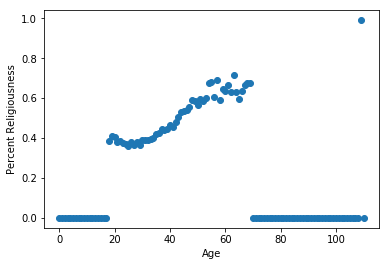

[[-0.0081961  -0.10722921 -0.03434031  0.22495756  0.07255583  0.24333497
   0.03170712]]


In [172]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier




#Create your df here:
df=pd.read_csv("profiles.csv")
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drugs_mapping)
sex_mapping = {"m":0,"f":1}
df["sex_code"] = df.sex.map(sex_mapping)
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))
diet_mapping = {"mostly anything": 3, "anything":4,"strictly anything":4,"kosher":3,"strictly kosher":3,"halal":3,"strictly halal":3,"other":2,"mostly vegetarian":2,"mostly other":2,"vegetarian":1,"strictly vegetarian":1,"mostly vegan":0,"vegan":0,"strictly vegan":0}
df["diet_code"] = df.diet.map(diet_mapping)
smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2,"trying to quit":3,"yes":4}
df["smokes_code"] = df.smokes.map(smokes_mapping)
body_type_mapping = {'average':1,'fit':0,'athletic':0,'thin':2,'curvy':2,'a little extra':2,'jacked':0,'overweight':3,'used up':3,'rather not say':1,'skinny':3,'full figured':3}
df["body_type_code"] = df.body_type.map(body_type_mapping)
religious_mapping = {'agnosticism':0,
'other':1,
'agnosticism but not too serious about it':0,
'agnosticism and laughing about it':0,
'catholicism but not too serious about it':1,
'atheism':0,
'other and laughing about it':1,
'atheism and laughing about it':0,
'christianity':1,
'christianity but not too serious about it':1,
'other but not too serious about it':1,
'judaism but not too serious about it':1,
'atheism but not too serious about it':0,
'catholicism':1,
'christianity and somewhat serious about it':1,
'atheism and somewhat serious about it':1,
'other and somewhat serious about it':1,
'catholicism and laughing about it':1,
'judaism and laughing about it':1,
'buddhism but not too serious about it':1,
'agnosticism and somewhat serious about it':0,
'judaism':1,
'christianity and very serious about it':1,
'atheism and very serious about it':0,
'catholicism and somewhat serious about it':1,
'other and very serious about it':1,
'buddhism and laughing about it':1,
'buddhism':1,
'christianity and laughing about it':1,
'buddhism and somewhat serious about it':1,
'agnosticism and very serious about it':1,
'judaism and somewhat serious about it':1,
'hinduism but not too serious about it':1,
'hinduism':1,
'catholicism and very serious about it':1,
'buddhism and very serious about it':1,
'hinduism and somewhat serious about it':1,
'islam':1,
'hinduism and laughing about it':1,
'islam but not too serious about it':1,
'judaism and very serious about it':1,
'islam and somewhat serious about it':1,
'islam and laughing about it':1,
'hinduism and very serious about it':1,
'islam and very serious about it':1}
df["religious_code"] = df.religion.map(religious_mapping)
print(df.head())
print(df.sex.value_counts())
df.height=df.height.where(df.height>50)
df.height=df.height.where(df.height<=84)
print(df.height.value_counts())
age_counts=[0]*111
age_religious_counts=[0]*111
for i in range(len(df)):
    age_counts[df['age'][i]]+=1
    if(df['religious_code'][i]==1):
        age_religious_counts[df['age'][i]]+=1
religiousness_by_age=[0]*111
for i in range(111):
    religiousness_by_age[i]=age_religious_counts[i]/(age_counts[i]+.01)
#PLOTTING
plt.plot(range(111),religiousness_by_age,'o')
plt.xlabel('Age')
plt.ylabel('Percent Religiousness')
plt.show()
qdf=df[['sex_code','diet_code','age','religious_code','drinks_code','drugs_code','income','height','essay_len','smokes_code','body_type_code']]
qdf=qdf.dropna()
cdf=qdf
#normalize here
min_max_scaler = preprocessing.MinMaxScaler()
qdf =pd.DataFrame(min_max_scaler.fit_transform(qdf.values),columns=cdf.columns)

#Regression number 1, mlr
x=qdf[['sex_code','age','religious_code','drinks_code','height','smokes_code','body_type_code']]
y=qdf[['drugs_code']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.coef_)
    

In [123]:
pd.DataFrame(qdf,columns=cdf.columns).corr()

,sex_code,diet_code,age,religious_code,drinks_code,drugs_code,income,height,essay_len,smokes_code,body_type_code
sex_code,1.000000,0.108403,-0.070920,-0.102094,0.008638,0.068068,0.082513,0.678620,0.002968,0.046763,-0.240185
diet_code,0.108403,1.000000,-0.058637,-0.025375,0.106787,-0.013660,0.000452,0.072262,-0.051056,0.037158,-0.019673
age,-0.070920,-0.058637,1.000000,0.137145,-0.111517,-0.174180,-0.007723,-0.046853,0.023622,-0.156162,-0.056656
religious_code,-0.102094,-0.025375,0.137145,1.000000,-0.088852,-0.122798,-0.009055,-0.109368,-0.098304,-0.041085,-0.018161
drinks_code,0.008638,0.106787,-0.111517,-0.088852,1.000000,0.216484,0.055296,0.037311,-0.044663,0.143351,-0.004479
drugs_code,0.068068,-0.013660,-0.174180,-0.122798,0.216484,1.000000,0.079253,0.084590,0.050766,0.326540,0.075851
income,0.082513,0.000452,-0.007723,-0.009055,0.055296,0.079253,1.000000,0.066496,0.003019,0.041248,-0.010586
height,0.678620,0.072262,-0.046853,-0.109368,0.037311,0.084590,0.066496,1.000000,0.021953,0.053556,-0.161174
essay_len,0.002968,-0.051056,0.023622,-0.098304,-0.044663,0.050766,0.003019,0.021953,1.000000,-0.049302,0.038118
smokes_code,0.046763,0.037158,-0.156162,-0.041085,0.143351,0.326540,0.041248,0.053556,-0.049302,1.000000,0.125401


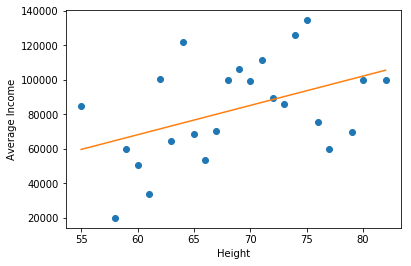

In [76]:
adf=df
adf.height=adf.height.where(adf.height>50)
adf.height=adf.height.where(adf.height<=84)
adf.income=adf.income.where(adf.income>0)
adf=adf.dropna()
heights=np.array([55.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,79.0,80,82.0])
heights=heights.reshape(-1,1)
hais=[85000.000000,20000.000000,60000.000000,50588.235294,33636.363636,100294.117647,64642.857143,122000.000000,68400.000000,53709.677419,70330.578512,99849.624060,106065.573770,99424.460432,111271.186441,89357.142857,86144.578313,125689.655172,134516.129032,75384.615385,60000.000000,70000.000000,100000.000000,100000.000000]
plt.plot(heights,hais,'o')
plt.ylabel('Average Income')
plt.xlabel('Height')
lf=LinearRegression()
lf.fit(heights,hais)
hl=lf.predict(heights)
plt.plot(heights,hl)
plt.show()

In [37]:
print(np.average(adf.income.dropna().where(adf.height==72)))

nan


In [108]:
start=time.time()
x=qdf[['age','religious_code','drinks_code','height','smokes_code','body_type_code']]
y=qdf[['drugs_code']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Coefficients for: Age, religiousness, freedom of drink, height, freedom of smoking, and lack of athleticism:")
print(regressor.coef_)
print("Accuracy Score: "+str(regressor.score(x_test,y_test)))
end=time.time()
print("Time elapsed: "+str(end-start)+" seconds")

Coefficients for: Age, religiousness, freedom of drink, height, freedom of smoking, and lack of athleticism:
[[-0.10806928 -0.03460177  0.22425545  0.09255501  0.24382289  0.02987412]]
Accuracy Score: 0.12700595093394573
Time elapsed: 0.008976221084594727 seconds


In [118]:
start=time.time()
x=qdf[['age','religious_code','drinks_code','height','smokes_code','body_type_code']]
y=qdf[['drugs_code']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
regressor=KNeighborsRegressor(n_neighbors=57,weights="uniform")
regressor.fit(x_train,y_train)
print("Accuracy Score: "+str(regressor.score(x_test,y_test)))
end=time.time()
print("Time elapsed: "+str(end-start)+" seconds")


Accuracy Score: 0.1351335996385833
Time elapsed: 0.3444700241088867 seconds


C:\Users\Mati\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


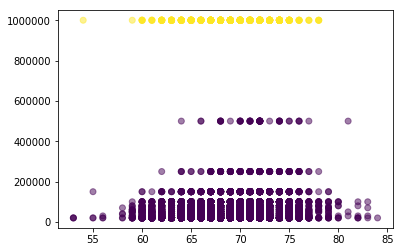

Accuracy: 0.7062717770034843%
Time elapsed: 0.7940726280212402 seconds


In [169]:
start=time.time()
sdf=df[['height','income','sex_code']]
sdf.income=sdf.income.where(sdf.income>0)
sdf=sdf.dropna()
info=sdf[['height','income']]
model=KMeans(n_clusters=2)
model.fit(info)
labels=model.predict(info)
x=sdf['height']
y=sdf['income']
plt.scatter(x,y,c=labels,alpha=.5)
plt.show()
hit=0
miss=0

#for i in range(len(labels)):
#    if(labels[i]==sdf.loc[i].at['sex_code']):
#        hit+=1
#    else:
#        miss+=1
#print(sdf['sex_code'].iloc[0])
for i in range(len(labels)):
    if(labels[i]==sdf['sex_code'].iloc[i]):
        hit+=1
    else:
        miss+=1
print("Accuracy: "+str(hit/(hit+miss))+"%")
end=time.time()
print("Time elapsed: "+str(end-start)+" seconds")

In [183]:
start=time.time()
x=sdf[['height','income']]
y=sdf[['sex_code']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
print("Accuracy: "+str(model.score(x_test,y_test)))
end=time.time()
print("Time elapsed: "+str(end-start)+" seconds")

Accuracy: 0.8458188153310104
Time elapsed: 0.030951261520385742 seconds


C:\Users\Mati\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
